# Digit classification using convolutional neural networks

# Setup

First, make sure that you have installed Keras on your computer.

In [1]:
# Code from https://github.com/keras-team/keras 

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K

Using TensorFlow backend.


# Load (and split) the MNIST dataset

In [2]:
# Code from https://github.com/keras-team/keras 

# the data, shuffled and split between train and test sets
#loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#flattening the 28*28 images to a 784 vector for all images
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the pixel values to the range 0 and 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


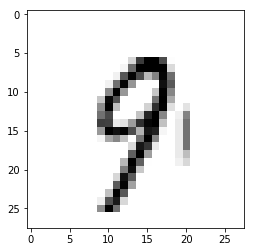

In [6]:
#select and display some digit from the dataset
import matplotlib
import matplotlib.pyplot as plt

#taking an images feature vector and reshaping it to a 28*28 pixel image 7201
some_digit_index = 7201
some_digit = x_train[some_digit_index]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

# Prepare the data

In [7]:
# Code from https://github.com/keras-team/keras 

num_classes = 10

# convert class vectors to binary class matrices
# one hot encoding of the class values
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Build the first model (deep MLP) in Keras  

In [8]:
# Code from https://github.com/keras-team/keras 
# relu function used for neurons in the hidden layer
# softmax is the activation function used on the output layer
#        to turn the outputs into probablity-like values and allow
#        one class tof the 10 to be selected as the model's output
#        prediction
# adam gradient descent is used to learn the weights
# logarithmic loss is used to compute loss function

#linear stack of layers
model1 = Sequential()

#fully connected layer with 512 hidden units. First layer needs input_shape
model1.add(Dense(512, activation='relu', input_shape=(784,)))

# regularization layer which randomly excludes 20% of the neurons in the layer to reduce overfitting
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.2))

# final layer with 10 neurons for 10 classes
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Training the first network  

12 epochs, mini-batch size = 128 <br/>
This will take ~10 seconds per epoch on a CPU.

In [9]:
# Code from https://github.com/keras-team/keras 

batch_size = 128
epochs = 12
history1 = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 339us/step - loss: 0.2444 - acc: 0.9252 - val_loss: 0.1037 - val_acc: 0.9666
Epoch 2/12
60000/60000 [==============================] - 19s 318us/step - loss: 0.1026 - acc: 0.9690 - val_loss: 0.0852 - val_acc: 0.9723
Epoch 3/12
60000/60000 [==============================] - 19s 325us/step - loss: 0.0758 - acc: 0.9773 - val_loss: 0.0740 - val_acc: 0.9792
Epoch 4/12
60000/60000 [==============================] - 20s 337us/step - loss: 0.0609 - acc: 0.9816 - val_loss: 0.0790 - val_acc: 0.9785
Epoch 5/12
60000/60000 [==============================] - 20s 339us/step - loss: 0.0506 - acc: 0.9847 - val_loss: 0.0906 - val_acc: 0.9775
Epoch 6/12
60000/60000 [==============================] - 20s 341us/step - loss: 0.0466 - acc: 0.9857 - val_loss: 0.0842 - val_acc: 0.9795
Epoch 7/12
60000/60000 [==============================] - 20s 338us/step - loss: 0.0388 - acc: 0.9884 - val_loss: 0.

# Evaluating performance on test set

In [10]:
score1 = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.0837242539306
Test accuracy: 0.9847


# Building the second model (CNN) in Keras  

In [11]:
# Code from https://github.com/keras-team/keras 

# Re-load and re-shape the dataset

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
# Code from https://github.com/keras-team/keras 
num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

# Training the second network  

12 epochs, mini-batch size = 128 <br/>
<b>WARNING:</b> This will take 3-5 minutes per epoch on a CPU! You might want to reduce the value of varibale 'epochs' before training the first time and/or save the resulting model after the training is over.

In [13]:
# Code from https://github.com/keras-team/keras 

batch_size = 128
epochs = 3
history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 320s 5ms/step - loss: 0.2561 - acc: 0.9216 - val_loss: 0.0573 - val_acc: 0.9820
Epoch 2/3
60000/60000 [==============================] - 312s 5ms/step - loss: 0.0854 - acc: 0.9747 - val_loss: 0.0384 - val_acc: 0.9871
Epoch 3/3
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0633 - acc: 0.9808 - val_loss: 0.0333 - val_acc: 0.9892


# Evaluating performance on test set

In [14]:
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.0333199583888
Test accuracy: 0.9892


# Best Solution

# Architecture with larger convolutional windows

In [90]:
# Code from https://github.com/keras-team/keras 

# Re-load and re-shape the dataset

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_test_conf=y_test

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [91]:
num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

'''conv2D-applies 64 convolutional filters of size 5*5 each
    MaxPooling2D- pooling layer with pool size of 2*2
    Flatten-converts 2D matrix data into a vector. outputs can
        be processed by standard fully connected layers
    Padding='same' gave the same result with more time to run
    First Dropout is on the visable layer
'''
CNN3 = Sequential()
CNN3.add(Dropout(0.20, input_shape=input_shape))
CNN3.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
CNN3.add(Conv2D(64, (5, 5), activation='relu'))
CNN3.add(MaxPooling2D(pool_size=(2,2)))
CNN3.add(Dropout(0.25))
CNN3.add(Flatten())
CNN3.add(Dense(128, activation='relu'))
CNN3.add(Dropout(0.5))
CNN3.add(Dense(num_classes, activation='softmax'))

CNN3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#Prints summary of layers
CNN3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_35 (Dropout)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 20, 20, 64)        102464    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               819328    
__________

In [92]:
batch_size = 64
epochs = 4

#Train the model
history3 = CNN3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 709s 12ms/step - loss: 0.2120 - acc: 0.9356 - val_loss: 0.0452 - val_acc: 0.9852
Epoch 2/4
60000/60000 [==============================] - 628s 10ms/step - loss: 0.0853 - acc: 0.9744 - val_loss: 0.0400 - val_acc: 0.9869
Epoch 3/4
60000/60000 [==============================] - 622s 10ms/step - loss: 0.0657 - acc: 0.9806 - val_loss: 0.0328 - val_acc: 0.9900
Epoch 4/4
60000/60000 [==============================] - 615s 10ms/step - loss: 0.0563 - acc: 0.9835 - val_loss: 0.0265 - val_acc: 0.9908


In [93]:
#gets the predictions to make a confusion matrix
prediction=CNN3.predict(x_test)

In [94]:
import numpy as np

#Returns the indices of the maximum values along an axis.
test=np.argmax(y_test, 1)
pred=np.argmax(prediction, 1)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix

#confusion matrix to table prediction vs actual
conf_matrix = confusion_matrix(test, pred)
print(conf_matrix)

[[ 976    1    0    0    0    0    1    1    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   2    2 1023    1    0    0    0    4    0    0]
 [   0    0    1 1002    0    3    0    2    2    0]
 [   1    0    0    0  974    0    1    1    1    4]
 [   2    0    0    5    0  880    3    1    0    1]
 [   5    2    0    0    1    2  948    0    0    0]
 [   0    3    3    0    0    0    0 1019    1    2]
 [   3    1    1    0    1    0    0    3  958    7]
 [   2    3    0    0    3    4    1    2    1  993]]


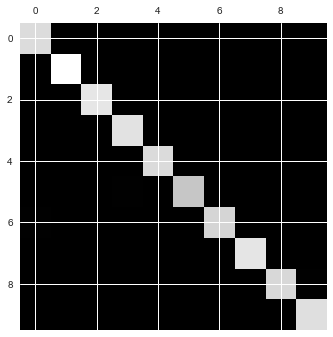

In [96]:
#Displays Matrix
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

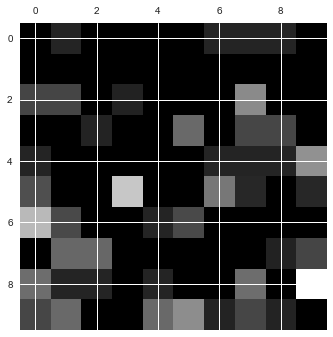

In [97]:
#focusing the plot on errors
row_sums = conf_matrix.sum(axis=1, keepdims=True)

#dividing each value in the confusion matrix by the number of images in corresponding classes
norm_conf_mx = conf_matrix / row_sums

#filling the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

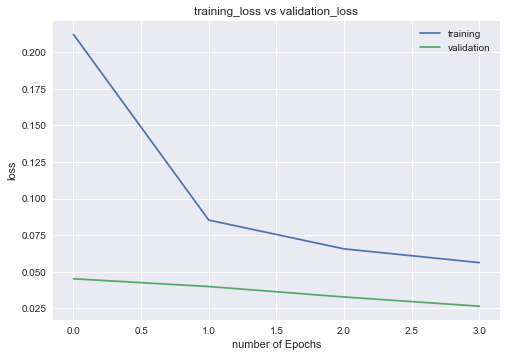

In [98]:
import matplotlib.pyplot as plt

#Getting history
training_loss=history3.history['loss']
validation_loss=history3.history['val_loss']
epochs=range(4)

#Plotting training and validation curves
plt.plot(epochs,training_loss)
plt.plot(epochs,validation_loss)

#Displaying plot
plt.xlabel('number of Epochs')
plt.ylabel('loss')
plt.title('training_loss vs validation_loss')
plt.grid(True)
plt.legend(['training','validation'])
plt.style.use('seaborn')
plt.show()

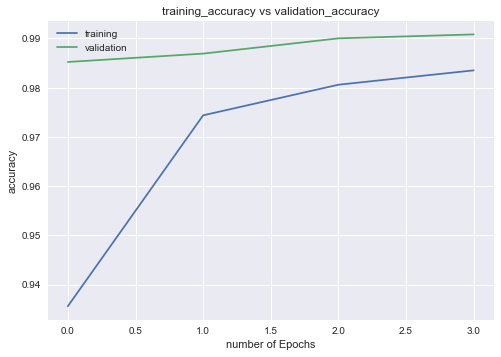

In [99]:
#Getting history
training_acc=history3.history['acc']
validation_acc=history3.history['val_acc']
epochs=range(4)

#Plotting training and validation curves
plt.plot(epochs, training_acc)
plt.plot(epochs, validation_acc)

#Displaying plot
plt.xlabel('number of Epochs')
plt.ylabel('accuracy')
plt.title('training_accuracy vs validation_accuracy')
plt.grid(True)
plt.legend(['training','validation'])
plt.style.use('seaborn')
plt.show()

In [100]:
score3 = CNN3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])
#Test loss: 0.0265202686068
#Test accuracy: 0.9908

Test loss: 0.0265202686068
Test accuracy: 0.9908


## Use a separate notebook